The basic idea behind SVM is to find a decision boundary that separates data points of different classes with the maximum margin.

Here's How SVM Algorithm Works:
The basic idea behind SVM is to find a decision boundary that separates data points of different classes with the maximum margin. 
It means that SVM aims to find the best line or curve that separates data points of different classes with the greatest possible distance. 
The data points closest to the decision boundary are called support vectors. Let’s understand how the SVM algorithm works by taking an 
example of a real-time business problem.

Suppose a company wants to predict whether a customer will default on a loan based on their credit score and income. The business can use SVM to find the best decision boundary that separates defaulting customers from non-defaulting customers based on their credit score and income. The SVM algorithm would analyze the historical data of customers who failed to repay their loans and those who did not, then find the best decision boundary that maximizes the margin between the two classes.

Once the decision boundary is found, it will predict whether a new customer will default on their loan based on their credit score and income. If a new customer falls on the default side of the decision boundary, the business can take appropriate action to mitigate the risk of default, such as declining the loan or raising the interest rate.

In [3]:
import numpy as np

n = 100
credit_scores = np.random.normal(loc=650, scale=100, size=n)
income = np.random.normal(loc=50000, scale=10000, size=n)
default = np.zeros(n)

default_idx = np.random.choice(range(n), size=20, replace=False)
default[default_idx] = 1

dataset = np.column_stack((credit_scores, income, default))

print(dataset)

[[4.79469961e+02 4.84882862e+04 0.00000000e+00]
 [6.66362929e+02 4.41330184e+04 0.00000000e+00]
 [6.94618001e+02 5.26754460e+04 0.00000000e+00]
 [4.02918560e+02 3.44562468e+04 0.00000000e+00]
 [6.95297585e+02 5.10549693e+04 0.00000000e+00]
 [7.27581734e+02 4.52049549e+04 0.00000000e+00]
 [5.16219744e+02 5.42383898e+04 0.00000000e+00]
 [5.82810301e+02 6.16060227e+04 0.00000000e+00]
 [6.71457658e+02 5.66754264e+04 0.00000000e+00]
 [6.19659872e+02 6.11737674e+04 0.00000000e+00]
 [5.97278494e+02 4.97534978e+04 0.00000000e+00]
 [5.92087646e+02 4.01927972e+04 1.00000000e+00]
 [6.99931912e+02 4.47872723e+04 0.00000000e+00]
 [5.58125070e+02 4.27791045e+04 1.00000000e+00]
 [4.95200804e+02 5.74106268e+04 0.00000000e+00]
 [6.14796694e+02 3.35320387e+04 0.00000000e+00]
 [7.88491504e+02 5.24012856e+04 0.00000000e+00]
 [7.25181719e+02 5.25946333e+04 0.00000000e+00]
 [6.18653893e+02 4.18190528e+04 0.00000000e+00]
 [6.77377260e+02 6.03789732e+04 0.00000000e+00]
 [7.29102052e+02 5.70897896e+04 1.000000

In [4]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(dataset[:, :2],
                                                   dataset[:, 2],
                                                   test_size=0.2, random_state=42)

from sklearn.svm import SVC

model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [7]:
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.95


In [8]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[19  0]
 [ 1  0]]


In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        19
         1.0       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


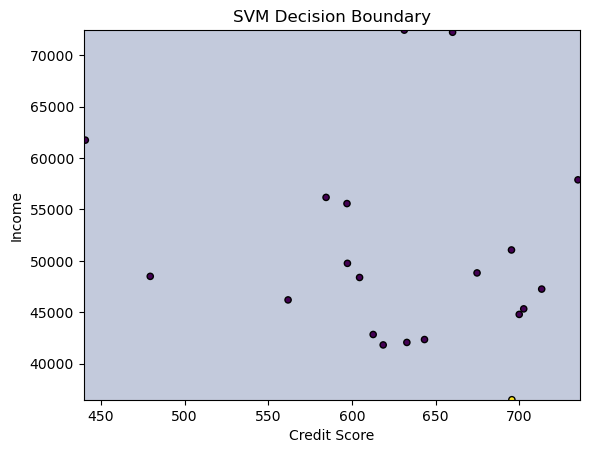

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", s=20)
    plt.xlabel("Credit Score")
    plt.ylabel("Income")
    plt.title("SVM Decision Boundary")
    plt.show()

plot_decision_boundary(model, X_test, y_test)
